In [1]:
import os
os.environ["LOGURU_LEVEL"] = "INFO"

from ect.tracking import (
    Tracker, 
    NaiveMatcher, 
    FFTTransformer, 
    FECTTransformer, 
    FECTCorrTransformer, 
    RelativeCartesianTracer as PositionTracer
)

from ect.helpers import SequenceImageGenerator, IdSequenceImageGenerator
from ect import Config

from typing import Callable

import numpy as np
from matplotlib import pyplot as plt

In [2]:
g = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test/1_seq_{id}.png", 14)
t = FFTTransformer()
p = PositionTracer(transformer=t)
m = NaiveMatcher(thresh=0.01)

tracker = Tracker(generator=g, matcher=m, transformer=t, callback=p.callback)

In [3]:
def center(inp: np.ndarray, invfunc: Callable[[np.ndarray], np.ndarray]) -> np.ndarray:
    X, Y = inp.shape
    inp = invfunc(inp)
    out = np.zeros_like(inp)
    out[:X//2, :Y//2] = inp[X//2:, Y//2:]
    out[X//2:, :Y//2] = inp[:X//2, Y//2:]
    out[X//2:, Y//2:] = inp[:X//2, :Y//2]
    out[:X//2, Y//2:] = inp[X//2:, :Y//2]
    return out

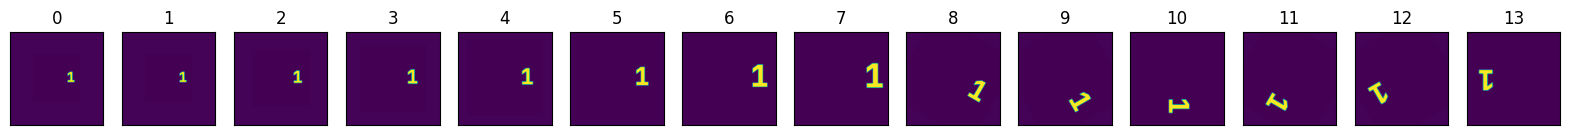

In [4]:

plt.figure(figsize=(20,5))

for idx, image in enumerate(g.images()):
    # print(idx)
    plt.subplot(1, 14, idx+1)
    plt.title(idx)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

Image 1. Delta: dx = 0, dy = 0
Image 2. Delta: dx = -13, dy = 0
Image 3. Delta: dx = -12, dy = 0
Image 4. Delta: dx = -12, dy = 1
Image 5. Delta: dx = -11, dy = 1
Image 6. Delta: dx = -23, dy = 2
Image 7. Delta: dx = -11, dy = 1
Image 8. Delta: dx = 38, dy = 44
Image 9. Delta: dx = 41, dy = 48
Image 10. Delta: dx = 59, dy = 21
Image 11. Delta: dx = 61, dy = -11
Image 12. Delta: dx = 47, dy = -41
Image 13. Delta: dx = 20, dy = -59


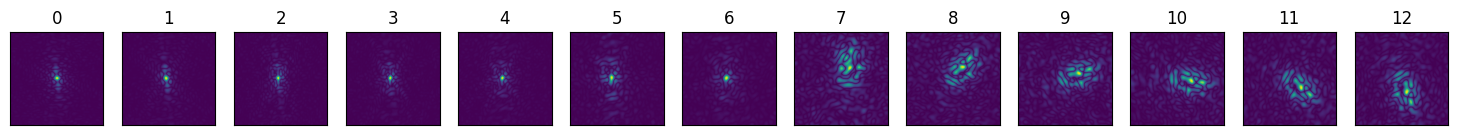

In [5]:
plt.figure(figsize=(20,5))

for idx, image in enumerate(tracker.track()):
    # print(idx)
    plt.subplot(1, 14, idx+1)
    plt.title(idx)
    plt.imshow(center(image, lambda x: np.abs(np.fft.ifft2(x))))
    plt.xticks([])
    plt.yticks([])

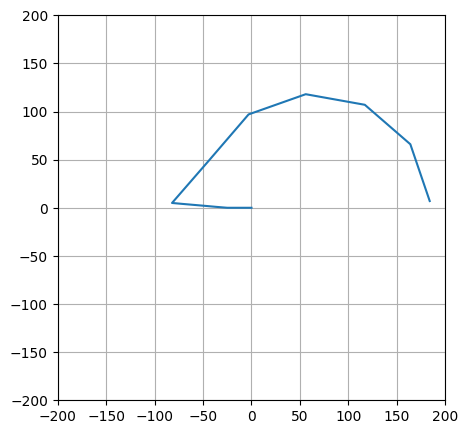

In [6]:
x, y = p.position

plt.figure(figsize=(5, 5))

plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.plot(x, y)
plt.grid()

In [7]:
g = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test/1_seq_{id}.png", 14)
t = FECTTransformer(Config(), (150, 50))
p = PositionTracer(transformer=t)
m = NaiveMatcher(thresh=0.1)

tracker = Tracker(generator=g, matcher=m, transformer=t, callback=p.callback)

Image 1. Delta: dx = 17, dy = 1
Image 2. Delta: dx = -23, dy = 5
Image 3. Delta: dx = -21, dy = 6
Image 4. Delta: dx = 21, dy = -58
Image 5. Delta: dx = -21, dy = 27
Image 6. Delta: dx = -18, dy = 22
Image 7. Delta: dx = -18, dy = 39
Image 8. Delta: dx = -22, dy = -62
Image 9. Delta: dx = 19, dy = 53
Image 10. Delta: dx = 22, dy = -9
Image 11. Delta: dx = -17, dy = -26
Image 12. Delta: dx = 18, dy = 14
Image 13. Delta: dx = 20, dy = 12


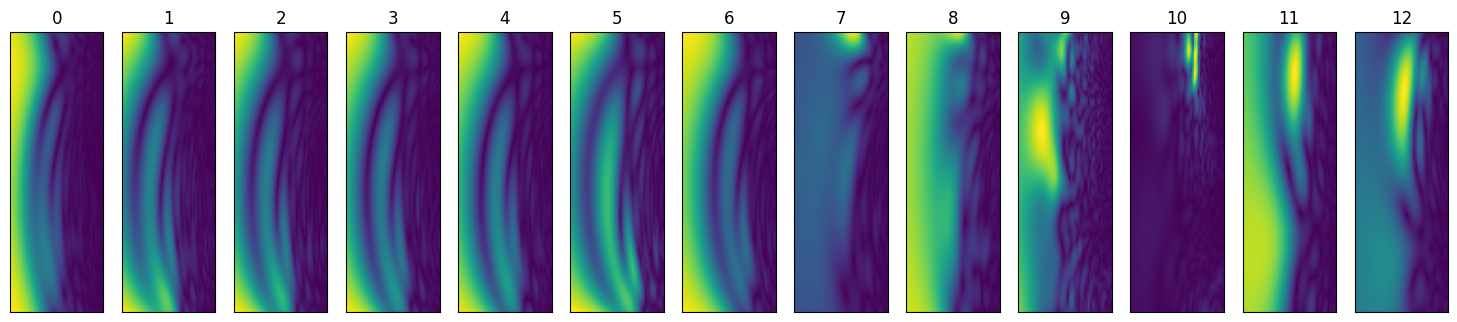

In [8]:
from ect import ifect

plt.figure(figsize=(20,5))

for idx, image in enumerate(tracker.track()):
    # print(idx)

    res = ifect(image, Config())

    plt.subplot(1, 14, idx+1)
    plt.title(idx)
    plt.imshow(np.abs(res))
    plt.xticks([])
    plt.yticks([])

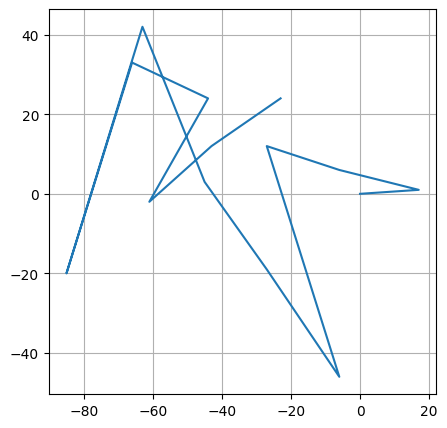

In [9]:
x, y = p.position

plt.figure(figsize=(5, 5))

# plt.xlim(-200, 200)
# plt.ylim(-200, 200)
plt.plot(x, y)
plt.grid()

In [10]:
g = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test/1_seq_{id}.png", 14)
t = FECTCorrTransformer(Config(), (314, 100))
p = PositionTracer(transformer=t)
m = NaiveMatcher(thresh=0.1)

tracker = Tracker(generator=g, matcher=m, transformer=t, callback=p.callback)

Image 1. Delta: dx = 0, dy = 0
Image 2. Delta: dx = 4, dy = 1
Image 3. Delta: dx = 3, dy = 0
Image 4. Delta: dx = 3, dy = 1
Image 5. Delta: dx = 3, dy = 1
Image 6. Delta: dx = 4, dy = 1
Image 7. Delta: dx = 2, dy = 0
Image 8. Delta: dx = -4, dy = -28
Image 9. Delta: dx = 1, dy = -25
Image 10. Delta: dx = 0, dy = -15
Image 11. Delta: dx = 0, dy = -38
Image 12. Delta: dx = -1, dy = -20
Image 13. Delta: dx = 0, dy = -27


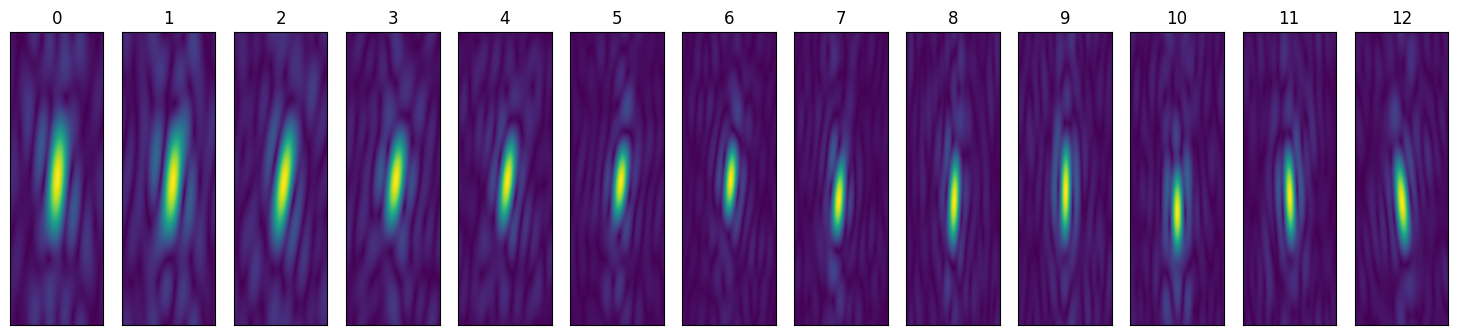

In [11]:
plt.figure(figsize=(20,5))

for idx, image in enumerate(tracker.track()):
    # print(idx)

    inv = lambda x: np.abs(np.fft.ifft2(x))

    plt.subplot(1, 14, idx+1)
    plt.title(idx)
    plt.imshow(center(image, inv))
    # plt.imshow(inv(image))
    plt.xticks([])
    plt.yticks([])

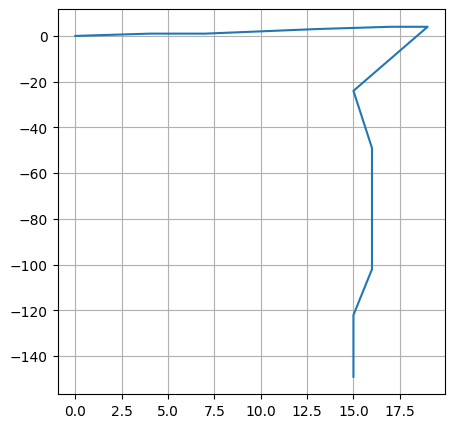

In [12]:
x, y = p.position

plt.figure(figsize=(5, 5))

plt.plot(x, y)
plt.grid()